<a href="https://colab.research.google.com/github/arleswasb/projeto_PP_03/blob/main/Pjt_PP_03_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baixando imagem de exemplo de: https://images.pexels.com/photos/1571458/pexels-photo-1571458.jpeg
Imagem original: 3400x2216 pixels.
Redimensionando para: 800x521 pixels.
Área de zoom definida para análise de detalhes.
------------------------------
Processando com o algoritmo: 1. Rápido (Nearest)...
  -> Tempo gasto: 0.10513 segundos
Processando com o algoritmo: 2. Bom (Bilinear)...
  -> Tempo gasto: 0.04558 segundos
Processando com o algoritmo: 3. Ótimo (Bicubic)...
  -> Tempo gasto: 0.07798 segundos
Processando com o algoritmo: 4. Excelente (Lanczos)...
  -> Tempo gasto: 0.11065 segundos


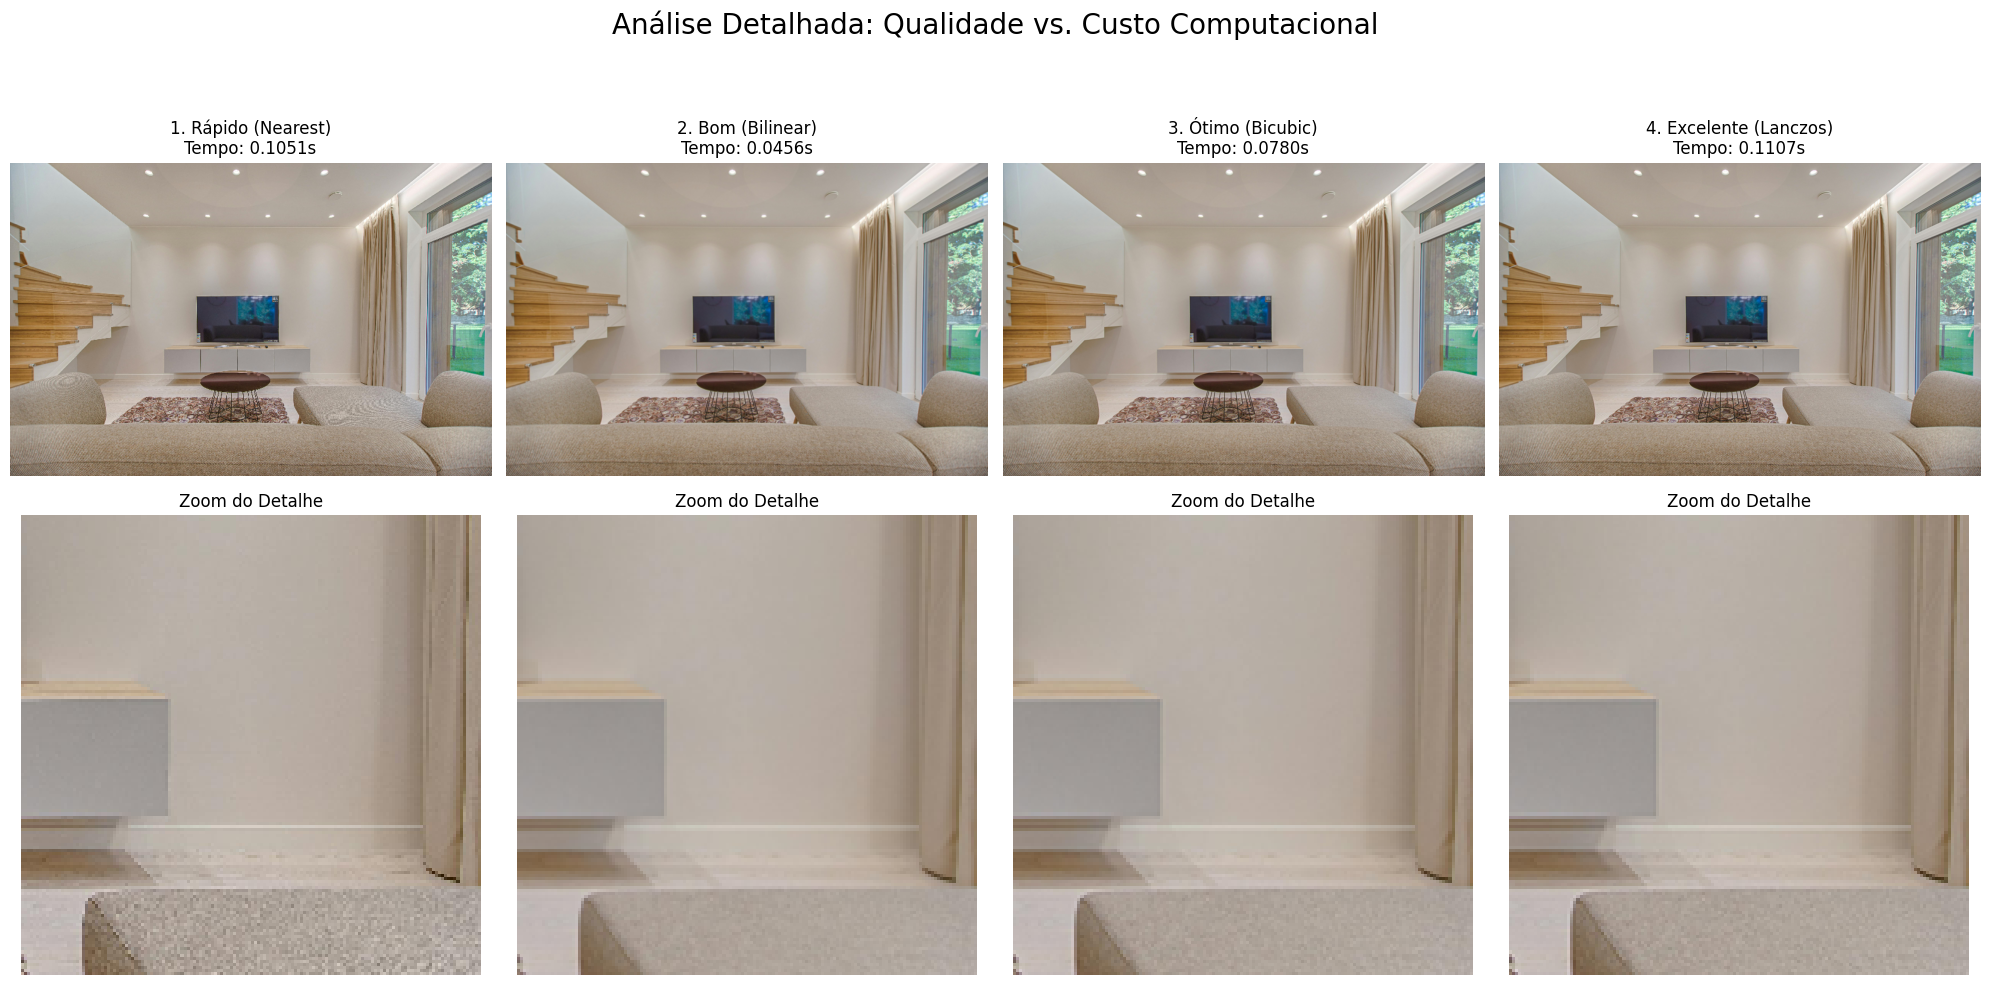

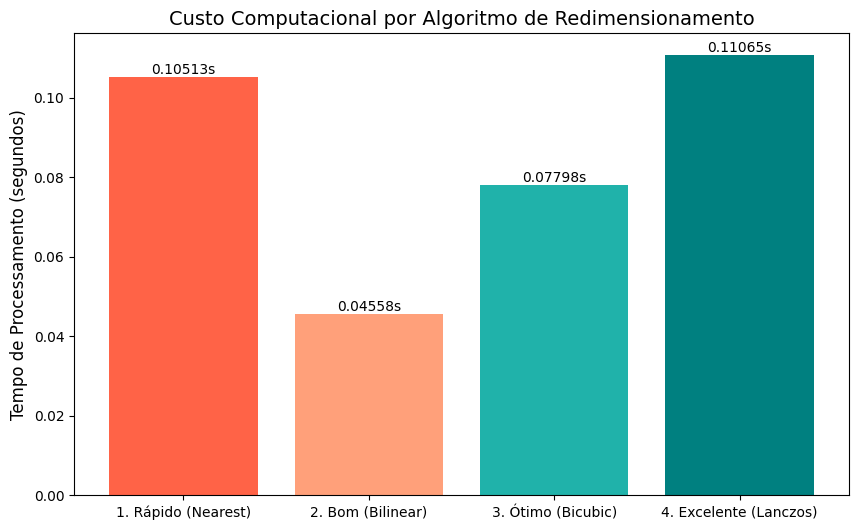

In [2]:
import requests
import time
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Preparação: Usar uma imagem mais adequada (arquitetura) ---
# Esta imagem tem muitas linhas retas e detalhes que evidenciam os problemas.
IMAGE_URL = "https://images.pexels.com/photos/1571458/pexels-photo-1571458.jpeg"
TARGET_WIDTH = 800

print(f"Baixando imagem de exemplo de: {IMAGE_URL}")
try:
    response = requests.get(IMAGE_URL)
    response.raise_for_status()
    original_image = Image.open(BytesIO(response.content))
except requests.exceptions.RequestException as e:
    print(f"Erro ao baixar a imagem: {e}")
    exit()

# Calcular a altura de destino para manter a proporção
original_width, original_height = original_image.size
aspect_ratio = original_height / original_width
target_height = int(TARGET_WIDTH * aspect_ratio)
target_size = (TARGET_WIDTH, target_height)

# --- Definir a área de zoom ---
# (left, upper, right, lower) -> Uma área com detalhes, como uma cadeira ou estante
# Estes valores foram escolhidos para focar em uma área com linhas e detalhes
crop_box = (450, 250, 600, 400)


print(f"Imagem original: {original_width}x{original_height} pixels.")
print(f"Redimensionando para: {target_size[0]}x{target_size[1]} pixels.")
print(f"Área de zoom definida para análise de detalhes.")
print("-" * 30)

# --- 2. Demonstração: Testar os algoritmos ---
algorithms = {
    "1. Rápido (Nearest)": Image.Resampling.NEAREST,
    "2. Bom (Bilinear)": Image.Resampling.BILINEAR,
    "3. Ótimo (Bicubic)": Image.Resampling.BICUBIC,
    "4. Excelente (Lanczos)": Image.Resampling.LANCZOS
}

results = []

for name, algo in algorithms.items():
    print(f"Processando com o algoritmo: {name}...")

    start_time = time.time()
    resized_img = original_image.resize(target_size, resample=algo)
    end_time = time.time()

    duration = end_time - start_time

    # Recortar a área de zoom da imagem redimensionada
    zoomed_crop = resized_img.crop(crop_box)

    results.append({
        "name": name,
        "time": duration,
        "image": resized_img,
        "zoom": zoomed_crop
    })

    print(f"  -> Tempo gasto: {duration:.5f} segundos")

# --- 3. Visualização dos Resultados (com Zoom) ---

# Criar uma figura com 2 linhas: uma para a imagem inteira, outra para o zoom
fig, axs = plt.subplots(2, len(algorithms), figsize=(20, 10))
fig.suptitle('Análise Detalhada: Qualidade vs. Custo Computacional', fontsize=20)

for i, res in enumerate(results):
    # Linha de cima: Imagens completas
    axs[0, i].imshow(res["image"])
    axs[0, i].set_title(f"{res['name']}\nTempo: {res['time']:.4f}s", fontsize=12)
    axs[0, i].axis('off')

    # Linha de baixo: Zoom nos detalhes
    axs[1, i].imshow(res["zoom"])
    axs[1, i].set_title(f"Zoom do Detalhe", fontsize=12)
    axs[1, i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# b) Gráfico de barras do tempo de processamento (continua igual e importante)
algorithm_names = [res['name'] for res in results]
processing_times = [res['time'] for res in results]

plt.figure(figsize=(10, 6))
bars = plt.bar(algorithm_names, processing_times, color=['#ff6347', '#ffa07a', '#20b2aa', '#008080'])
plt.ylabel('Tempo de Processamento (segundos)', fontsize=12)
plt.title('Custo Computacional por Algoritmo de Redimensionamento', fontsize=14)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.5f}s', va='bottom', ha='center')

plt.show()